In [59]:
import numpy as np
from matplotlib import pyplot as plt, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

###variable declarations
nx = 41
ny = 41
CFL = 0.05
nt = 10
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
nu = .1
dt = CFL*dx *dy/nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, nx)
un = np.ones((ny,nx))
vn = np.ones([ny,nx])
u = np.ones((ny,nx))
v = np.ones([ny,nx])
un.shape

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)





In [60]:
###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

Text(0.5, 0.5, '$y$')

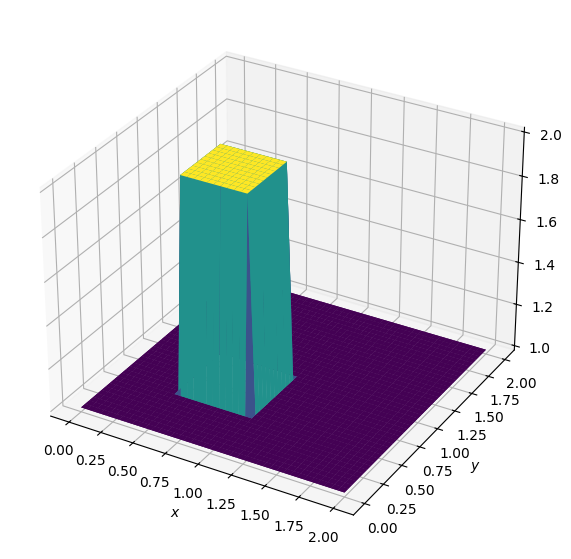

In [61]:
###(plot ICs)
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')  # Correct way to create a 3D plot
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [62]:
for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                     dt / dy * vn[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                     nu * dt / dy**2 * 
                     (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                     dt / dx * un[1:-1, 1:-1] *
                     (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     dt / dy * vn[1:-1, 1:-1] * 
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     nu * dt / dy**2 *
                     (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))
     
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

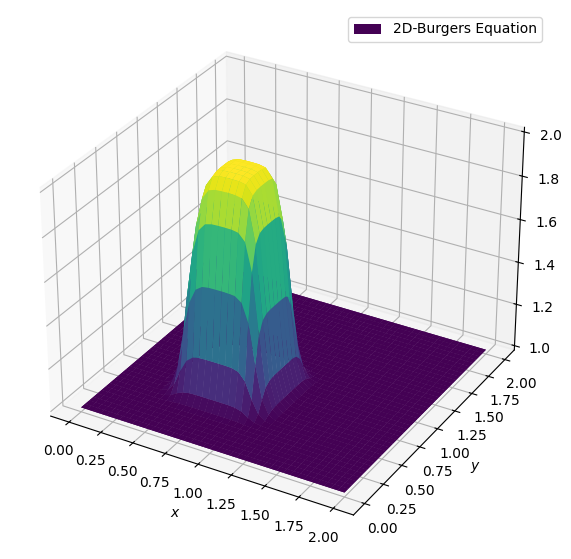

In [63]:
# Create figure and 3D axis
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')  # Correct way to create a 3D plot
X, Y = np.meshgrid(x,y)

# Plot the surface
ax.plot_surface(X, Y, u, cmap=cm.viridis)
ax.plot_surface(X, Y, v, cmap=cm.viridis)


# Labels
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


ax.legend(['2D-Burgers Equation'], loc='best')